In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px


%matplotlib inline
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

In [ ]:
main_df = pd.read_csv('netflix_titles.csv')
main_df.head()

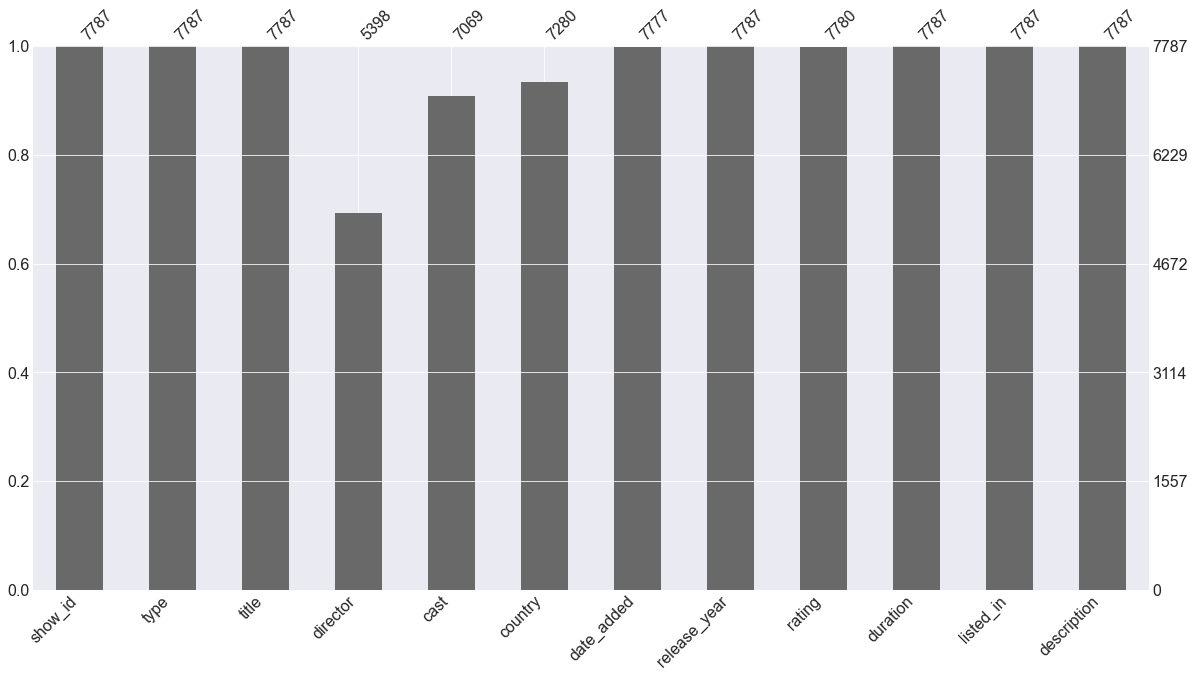

In [4]:
msno.bar(main_df, figsize=(20,10))
plt.show()

In [5]:
main_df.describe(include=[np.number])

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [7]:
countries = main_df['country'].value_counts()[main_df['country'].value_counts(normalize=True)> 0.005]
list_countries = list(countries.index)

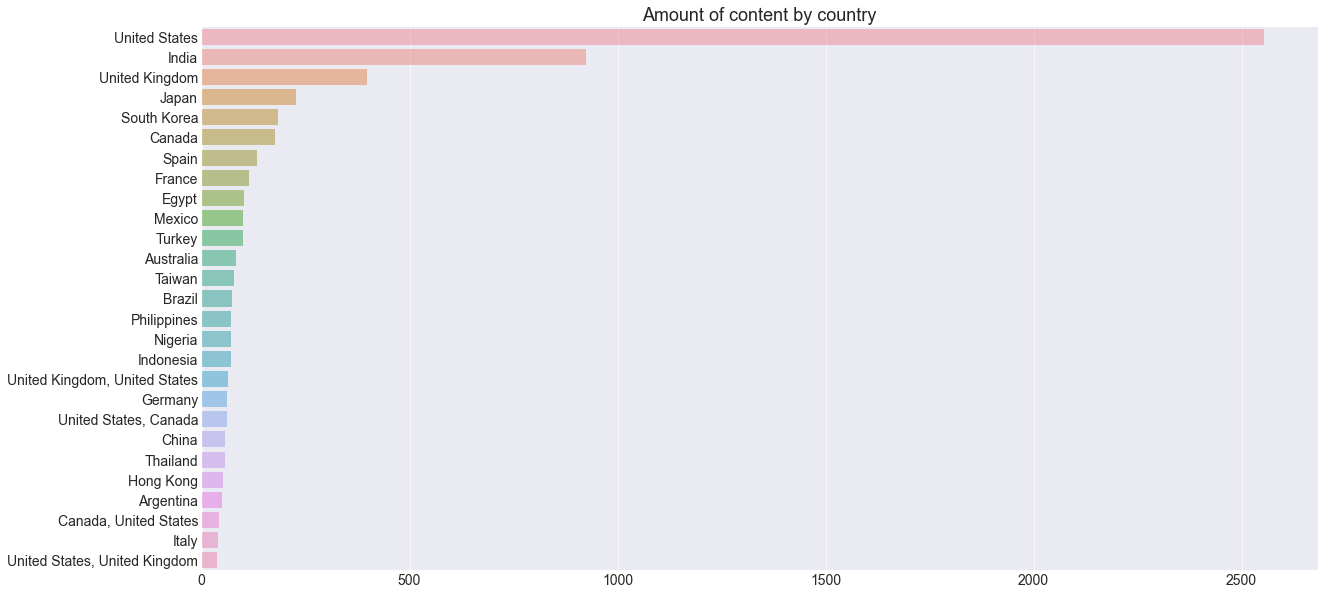

In [8]:
plt.figure(figsize=(20,10))
plt.title('Amount of content by country', fontsize=18)
plt.tick_params(labelsize=14)
sns.barplot(y=countries.index, x=countries.values, alpha=0.6)
plt.show()

In [14]:
plt.figure(figsize=(14, 7))

figure = px.pie(countries.sort_values(ascending=False).iloc[:20], values=countries.values, names=countries.index,
                title='Content quantity by country in percentage', color_discrete_sequence=px.colors.sequential.RdBu)
figure.show()

<Figure size 1008x504 with 0 Axes>

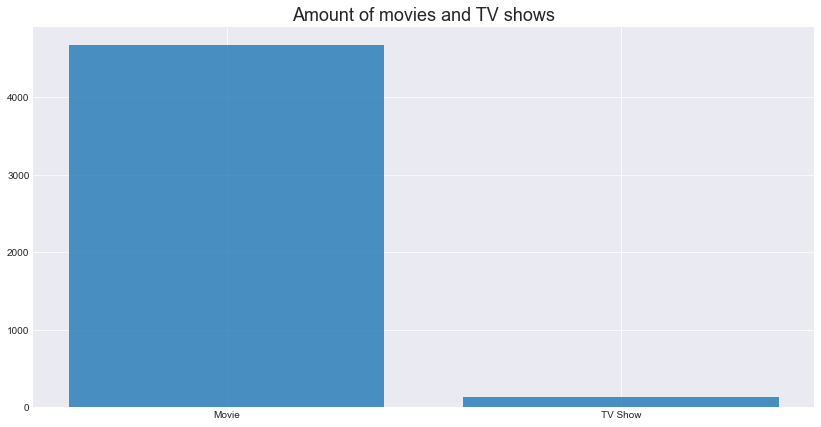

In [28]:
content_type = main_df['type'].value_counts()


plt.figure(figsize=(14, 7))

plt.bar(content_type.index, content_type.values, alpha=0.8)
plt.title('Amount of movies and TV shows', fontsize=18)
plt.show()

In [17]:
TVshows = main_df[main_df['type'] == 'TV Show']
Movie = main_df[main_df['type'] == 'Movie']

In [18]:
TVshows_progress = TVshows['release_year'].value_counts().sort_index()
Movie_progress = Movie['release_year'].value_counts().sort_index()

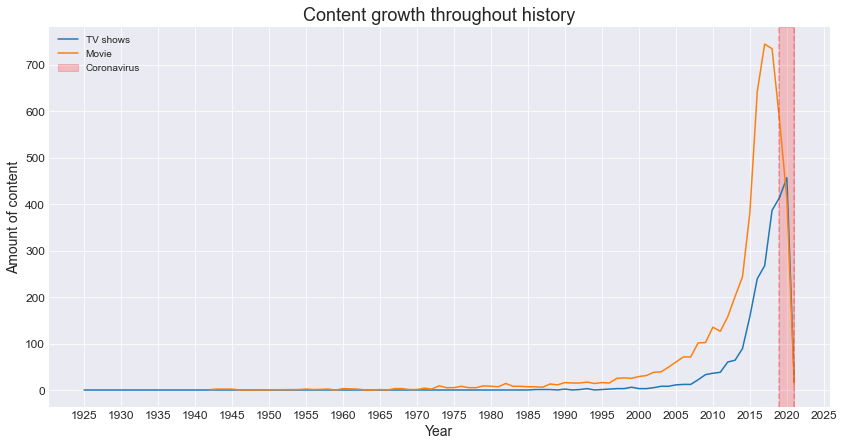

In [19]:
plt.figure(figsize=(14, 7))

plt.plot(TVshows_progress.index, TVshows_progress.values, label='TV shows')
plt.plot(Movie_progress.index, Movie_progress.values, label='Movie')

plt.axvline(2019, alpha=0.3, linestyle='--', color='r')
plt.axvline(2021, alpha=0.3, linestyle='--', color='r')
plt.axvspan(2019, 2021, alpha=0.2, color='r', label='Coronavirus')

plt.xticks(list(range(1925, 2026, 5)), fontsize=12)
plt.title('Content growth throughout history', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount of content', fontsize=14)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

In [21]:
main_df.dropna(inplace=True)

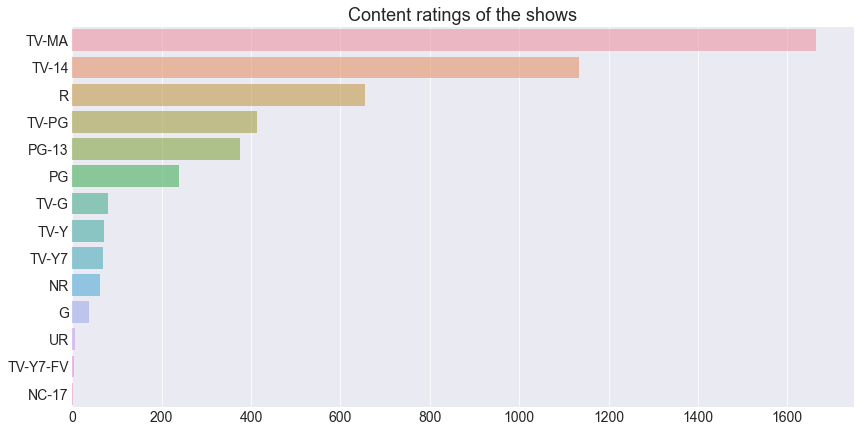

In [22]:
rating = main_df['rating'].value_counts()

plt.figure(figsize=(14,7))
plt.title('Content ratings of the shows', fontsize=18)
plt.tick_params(labelsize=14)
sns.barplot(y=rating.index, x=rating.values, alpha=0.6)

plt.show()

<ipython-input-27-a5ecd718cda5>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\GAME\anaconda3\envs\env_assignment_1\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



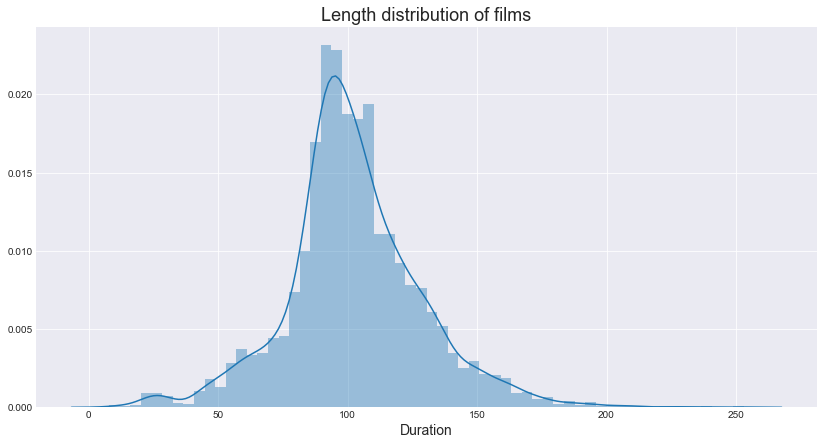

In [27]:
grp = main_df.groupby('type')
movie = grp.get_group('Movie')
movie['duration'] = [int(i.split(' ')[0]) for i in movie.duration.dropna()]

plt.figure(figsize=(14, 7))

sns.distplot(movie['duration'], bins=60).set(ylabel=None)

plt.title('Length distribution of films', fontsize=18)
plt.xlabel('Duration', fontsize=14)
plt.show()

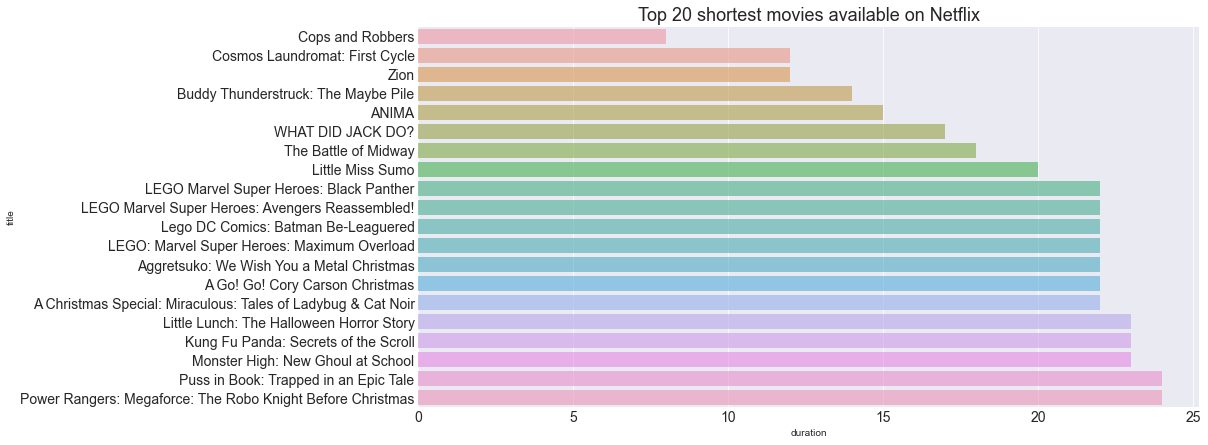

In [24]:
short = movie.sort_values('duration')[['title', 'duration']].iloc[:20]

plt.figure(figsize=(14,7))
plt.title('Top 20 shortest movies available on Netflix', fontsize=18)
plt.tick_params(labelsize=14)
sns.barplot(y=short['title'], x=short['duration'], alpha=0.6)

plt.show()

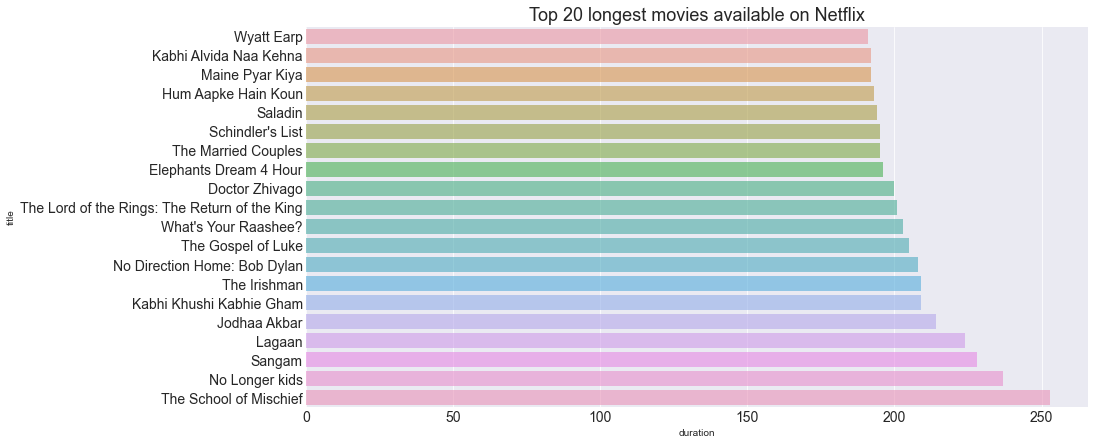

In [25]:
long = movie.sort_values('duration')[['title', 'duration']].iloc[-20:]

plt.figure(figsize=(14,7))
plt.title('Top 20 longest movies available on Netflix', fontsize=18)
plt.tick_params(labelsize=14)
sns.barplot(y=long['title'], x=long['duration'], alpha=0.6)

plt.show()

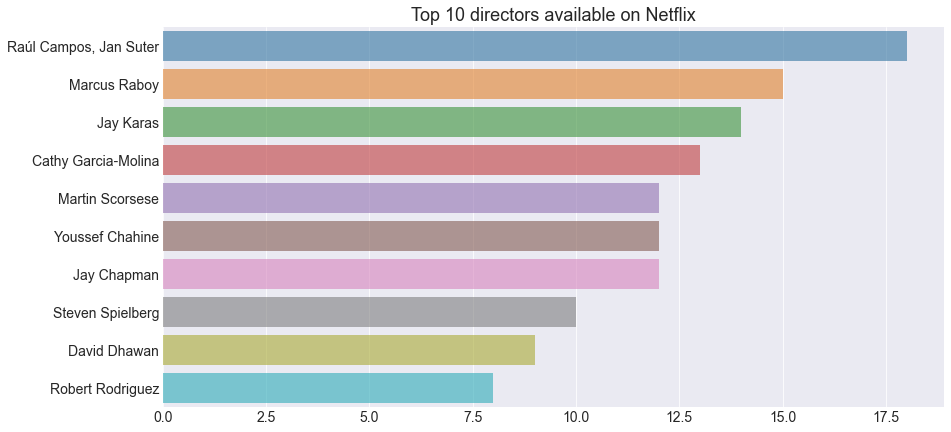

In [26]:
directors = main_df['director'].value_counts()

plt.figure(figsize=(14,7))
plt.title('Top 10 directors available on Netflix', fontsize=18)
plt.tick_params(labelsize=14)
sns.barplot(y=directors.index[:10], x=directors.values[:10], alpha=0.6)

plt.show()